In [2]:
# Importing all the needed libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import random
random.seed(42)

In [3]:
# We are reading our data
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains; 

1. age - age in years <br/>
2. sex - (1 = male; 0 = female) <br/>
3. cp - chest pain type <br/>
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br/>
5. chol - serum cholestoral in mg/dl <br/>
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br/>
7. restecg - resting electrocardiographic results <br/>
8. thalach - maximum heart rate achieved <br/>
9. exang - exercise induced angina (1 = yes; 0 = no) <br/>
10. oldpeak - ST depression induced by exercise relative to rest <br/>
11. slope - the slope of the peak exercise ST segment <br/>
12. ca - number of major vessels (0-3) colored by flourosopy <br/>
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br/>
14. target - have disease or not (1=yes, 0=no)

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
#check null value 

print('data sum of null values')
df.isnull().sum()

data sum of null values


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df_clean = df.copy()

# Exploring the data

In [8]:
# Data Types of each of the fields

df_clean.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

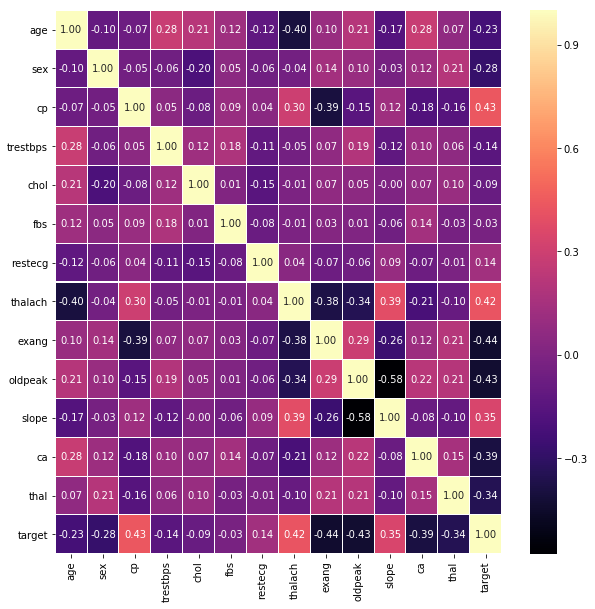

In [9]:
# Create Correlation Plot
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_clean.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


In [65]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
#Feature Selection
df_y=df['target']
df_x=df.drop(['target'],axis=1)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 7)
fit = rfe.fit(df_x, df_y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 7
Selected Features: [False  True  True False False False False False  True  True  True  True
  True]
Feature Ranking: [5 1 1 4 7 6 2 3 1 1 1 1 1]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [59]:
X_train_2.describe()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,...,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,0.000614,-0.004000,-0.039601,0.035320,-0.043078,0.305785,0.694215,0.450413,0.177686,0.293388,...,0.107438,0.061983,0.016529,0.004132,0.066116,0.553719,0.376033,0.066116,0.466942,0.466942
std,0.987336,1.006880,0.990889,0.984613,0.971564,0.461694,0.461694,0.498566,0.383040,0.456259,...,0.310311,0.241625,0.127762,0.064282,0.248999,0.498136,0.485392,0.248999,0.499940,0.499940
min,-2.797624,-2.148802,-2.324160,-2.608388,-0.896862,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.702136,-0.663867,-0.720145,-0.662380,-0.896862,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.180175,-0.092738,-0.121055,0.190365,-0.379244,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.731619,0.478391,0.507023,0.802592,0.483451,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,2.385951,3.448262,6.140401,2.289429,4.451851,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Inference from above correlation matrix

# It's clear that chest pain, Maximum Heart Rate and Slope seem to have higher positive correlation 

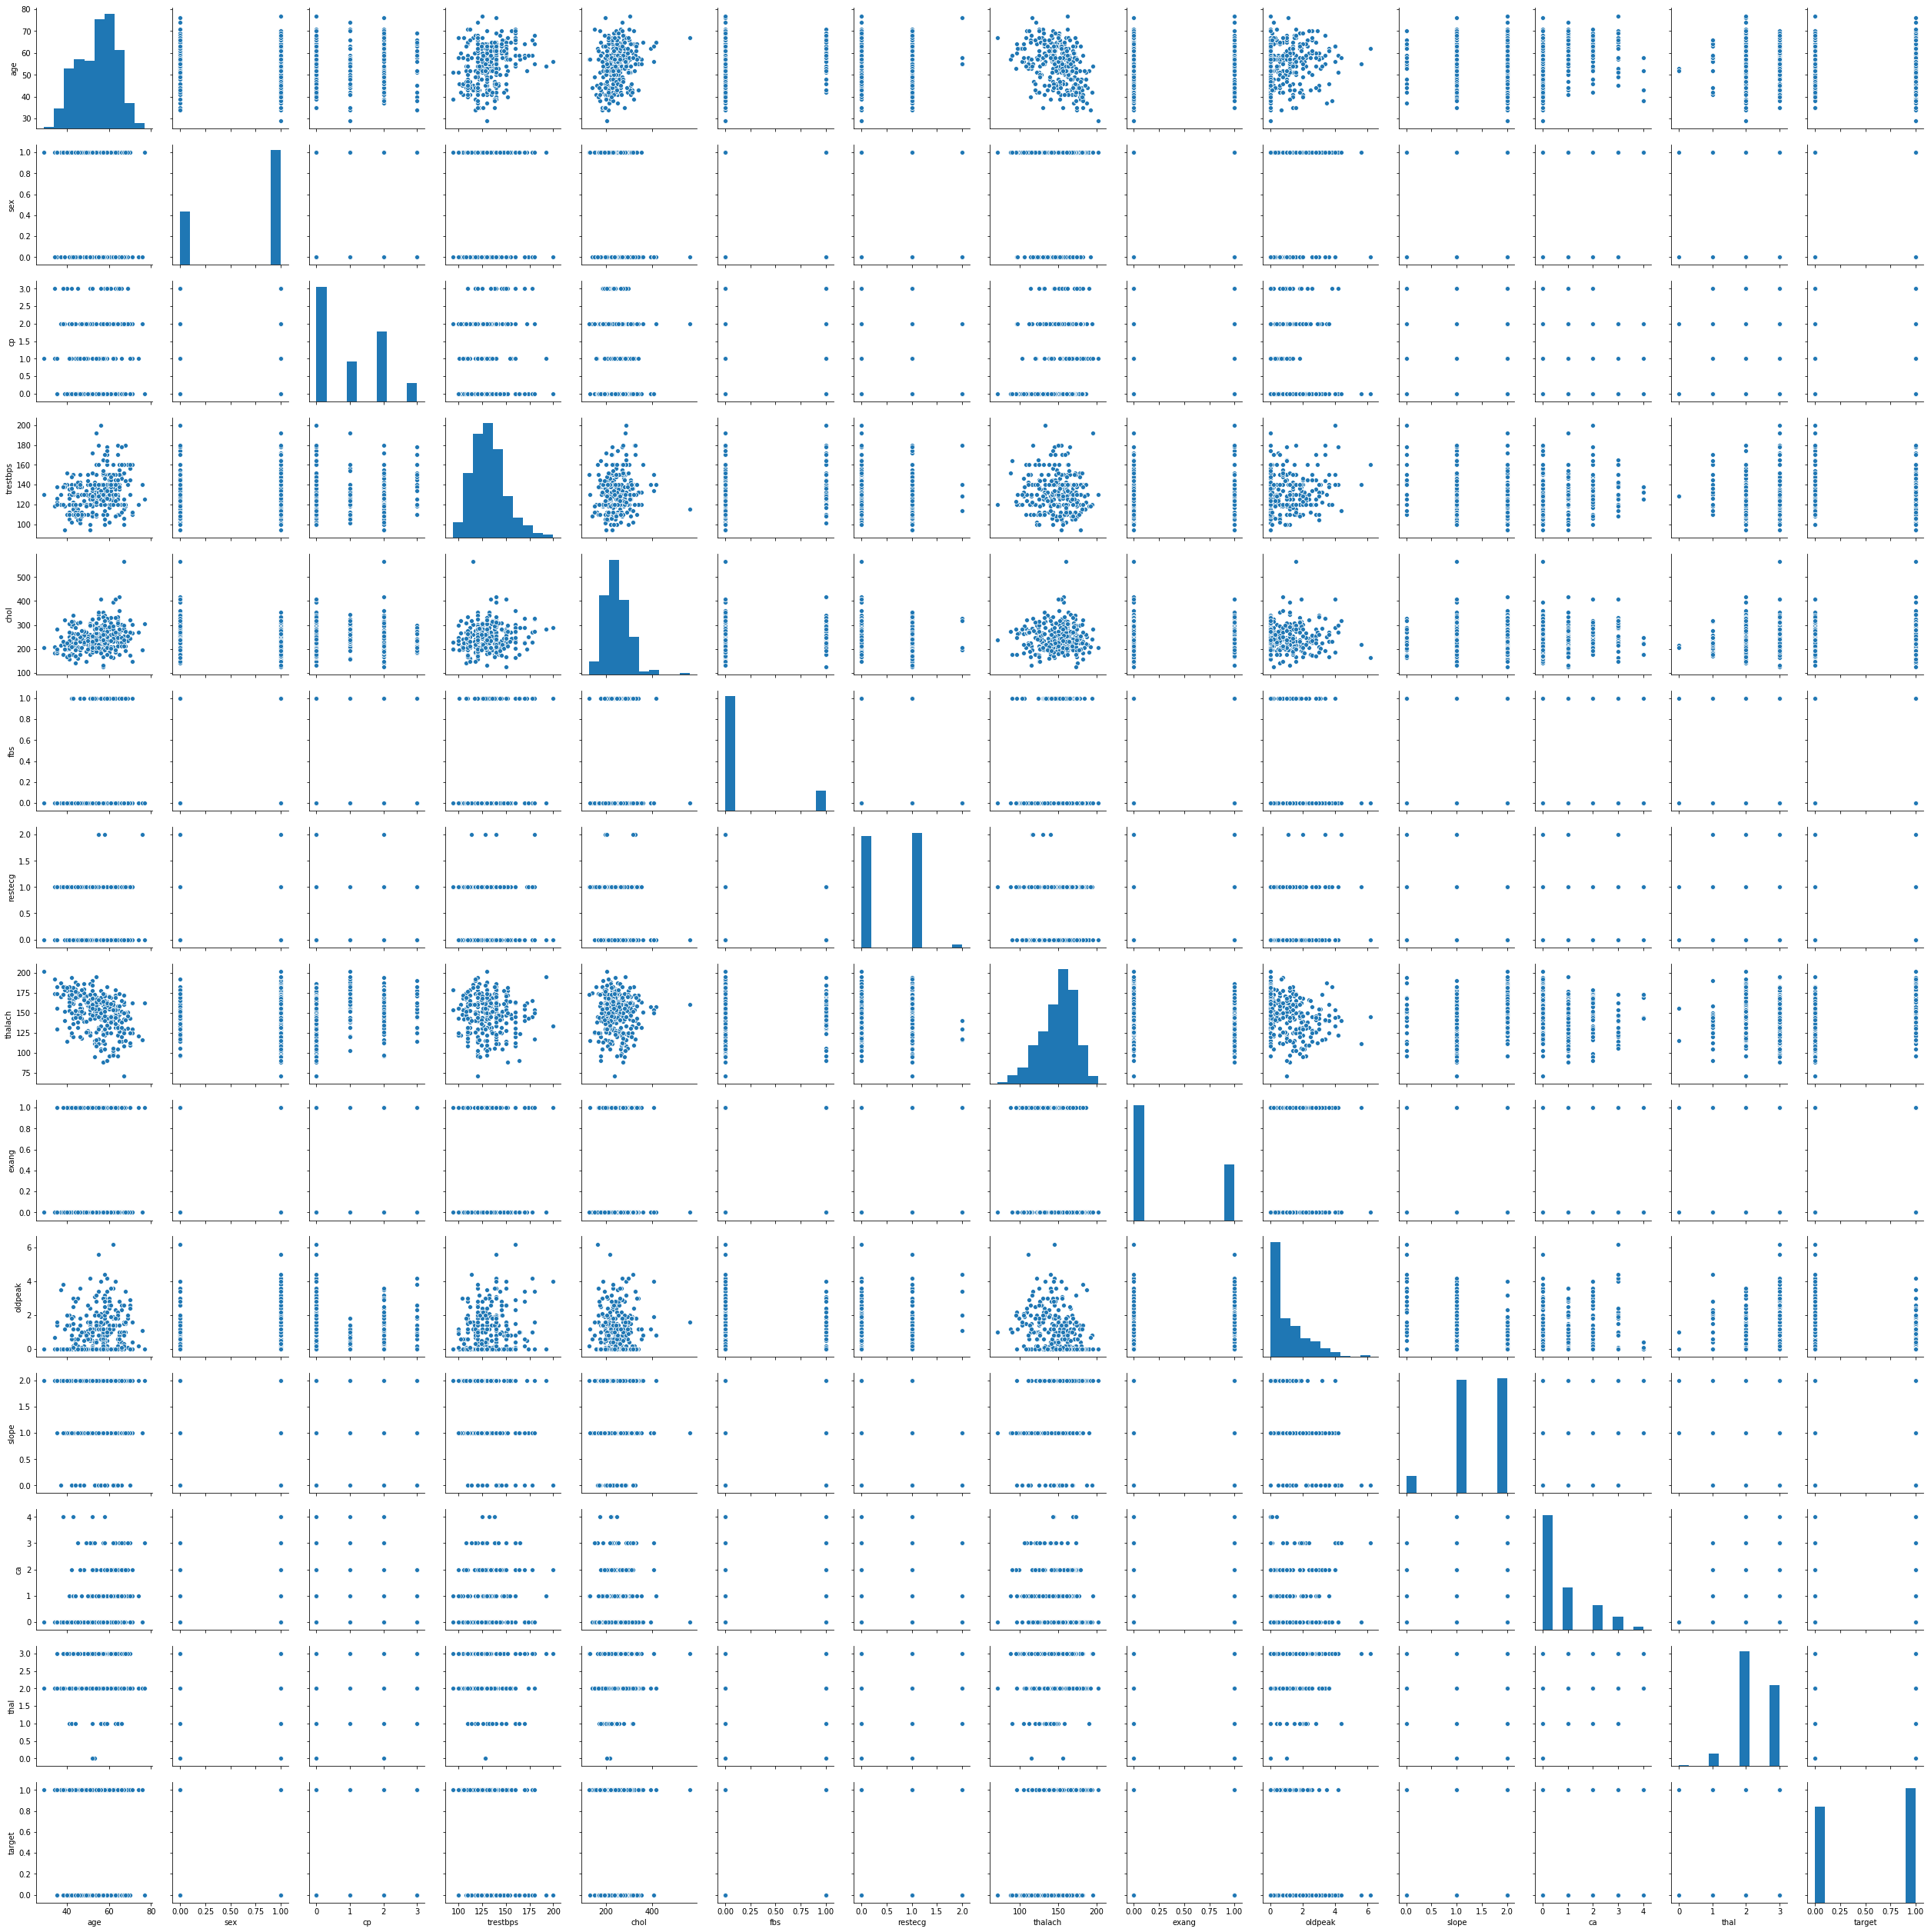

In [11]:
# Charting a pairplot
sns.pairplot(data=df)

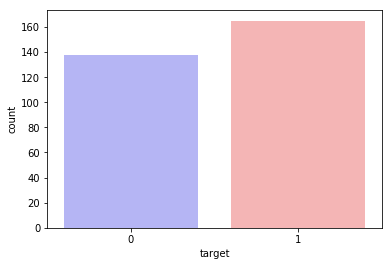

In [12]:
# From the data set who have heart disease vs. not

sns.countplot(x="target", data=df, palette="bwr")
plt.show()

People having heart diseace vs people who doesn't: 
 1    165
0    138
Name: target, dtype: int64


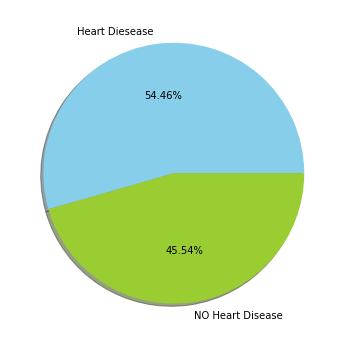

In [13]:
print("People having heart diseace vs people who doesn't: \n", df.target.value_counts())
heart_disease = len(df[df['target']==1])
no_heart_disease = len(df[df['target']==0])
labels = ["Heart Diesease", "NO Heart Disease"]
sizes = [heart_disease, no_heart_disease]
colors = ['skyblue', 'yellowgreen']
plt.figure(figsize=(8,6))
explode = (0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True)
plt.show()

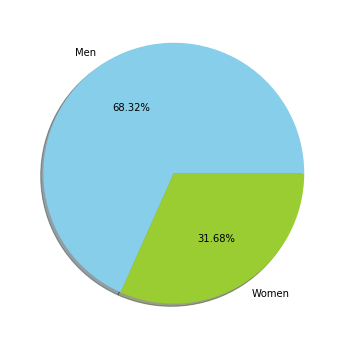

In [14]:
# male / female counts 

#print("Men vs Women Count\n", df.sex.value_counts())
men_count = len(df[df['sex']== 1])
women_count = len(df[df['sex']==0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'Men','Women'
sizes = [men_count,women_count]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True)
plt.show()

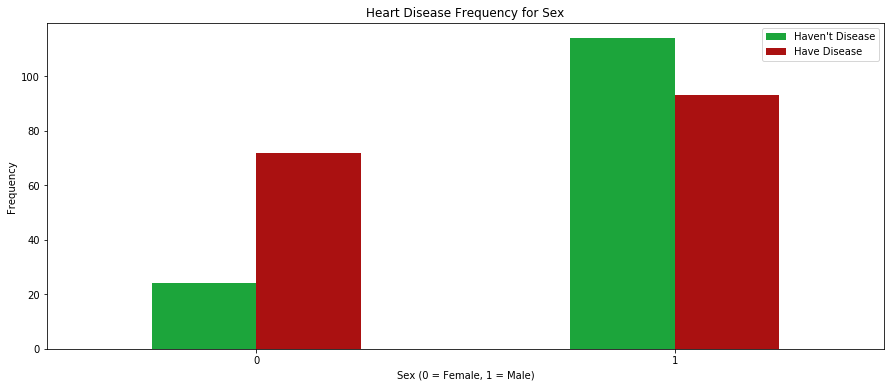

In [15]:
#Heart disease based on sex 
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


In [16]:
# Group by target …all other variables
df.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


Text(0, 0.5, 'Heart Disease Frequency')

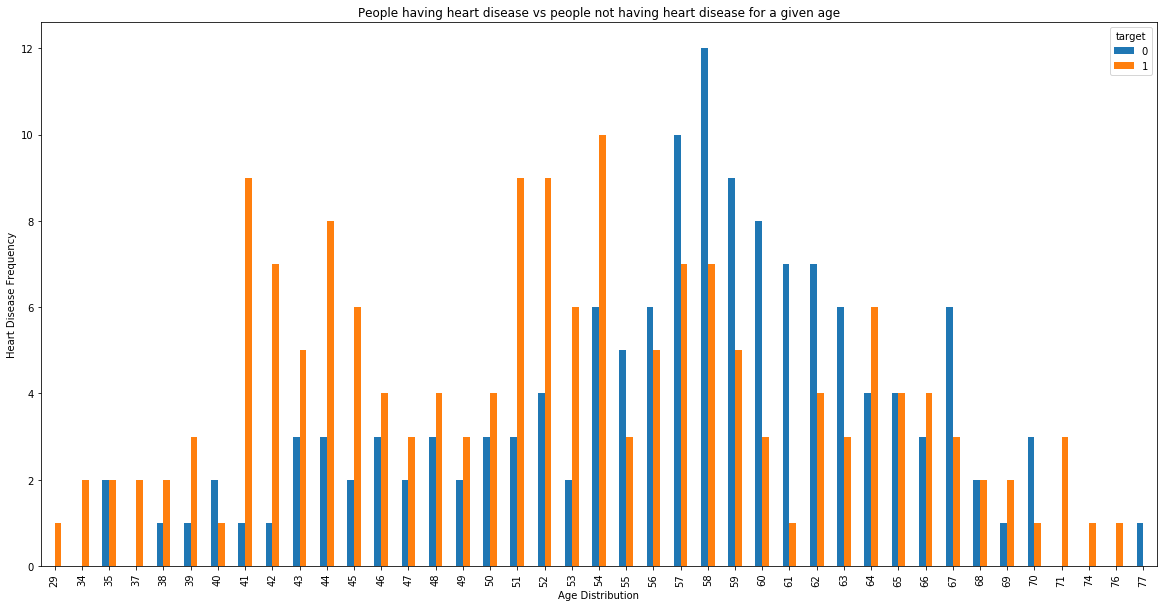

In [17]:
#Analyzing heart disease over age distribution

pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20, 10))
plt.title("People having heart disease vs people not having heart disease for a given age")
plt.xlabel("Age Distribution")
plt.ylabel("Heart Disease Frequency")


# Inference
We could infer from the chart above that age is not a huge influening factor for heart disease


Text(0, 0.5, 'Heart Disease Frequency')

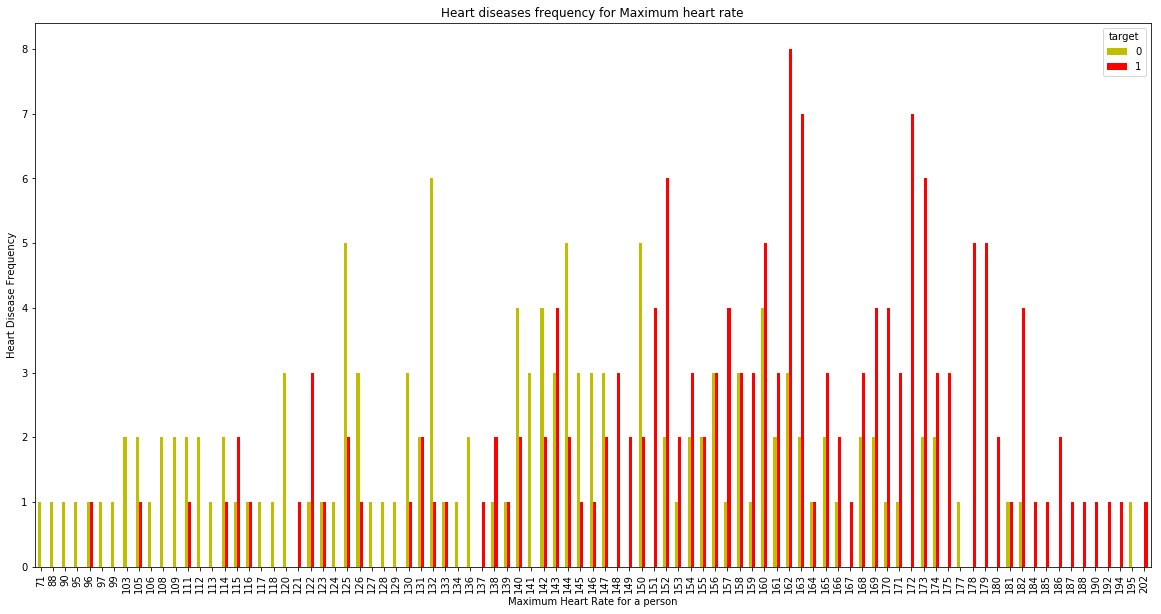

In [18]:
#Analyzing heart disease over Maximum Heart Rate

my_colors = 'yr'
pd.crosstab(df.thalach, df.target).plot(kind='bar', figsize=(20,10), color=my_colors)
plt.title("Heart diseases frequency for Maximum heart rate")
plt.xlabel("Maximum Heart Rate for a person")
plt.ylabel("Heart Disease Frequency")


# Inference
We could infer from the above chart that people who have higher heart rate has a higher probability of having a heart disease


Text(0, 0.5, 'Heart Disease Frequency')

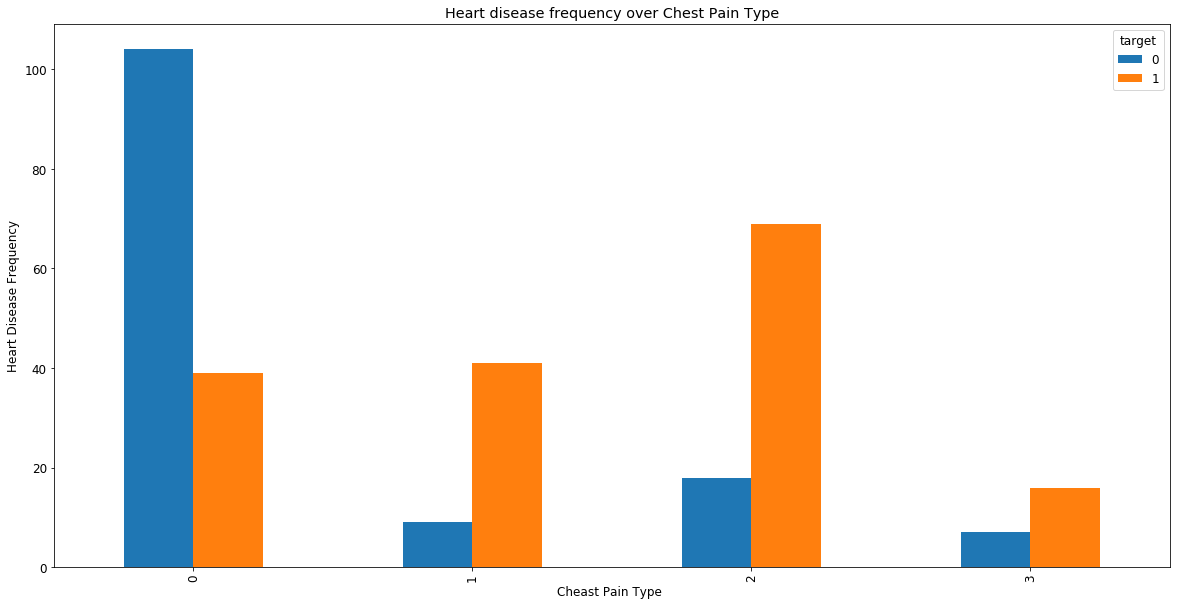

In [56]:
#Analyzing heart disease frequency over chest pain type


pd.crosstab(df.cp, df.target).plot(kind='bar', figsize = (20,10))
plt.title("Heart disease frequency over Chest Pain Type")
plt.xlabel("Cheast Pain Type ")
plt.ylabel("Heart Disease Frequency")


# Inference
We could infer from the above chrat that people who have Atypical angina or non-anginal pain have higher probability of having heart disease



Text(0, 0.5, 'Heart Disease Frequency')

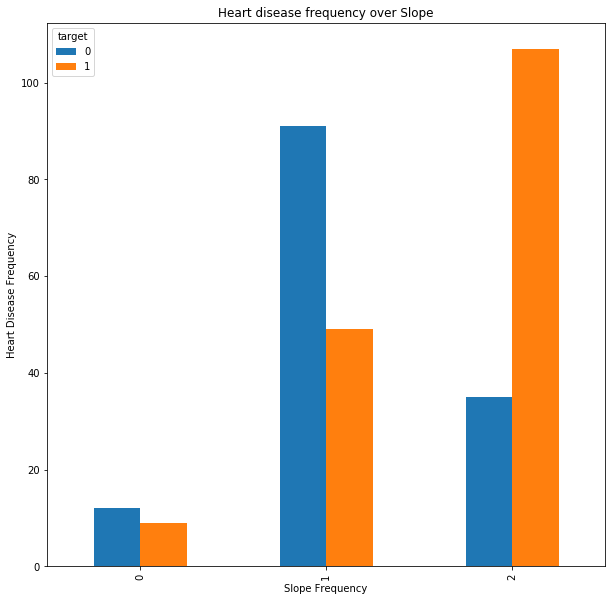

In [20]:
#Analyzing Heart disease frequency over Slope
#1 --> upsloping
#2 --> flat
#3 --> downsloping

pd.crosstab(df.slope, df.target).plot(kind='bar', figsize=(10,10))
plt.title("Heart disease frequency over Slope")
plt.xlabel("Slope Frequency")
plt.ylabel("Heart Disease Frequency")



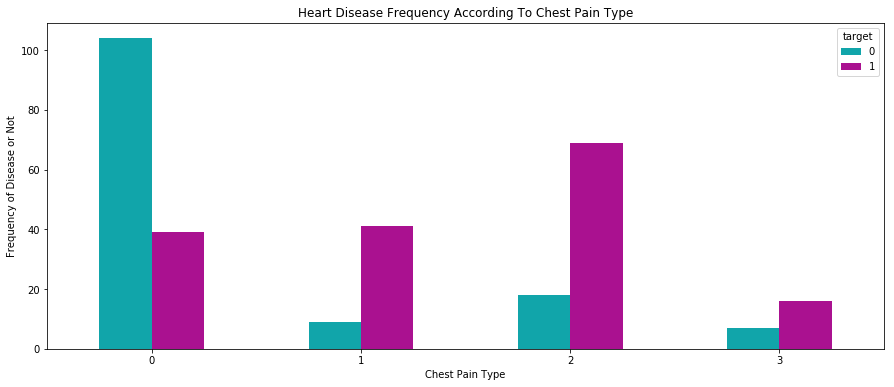

In [21]:
#Heart disease frequency based on chest pain type

pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

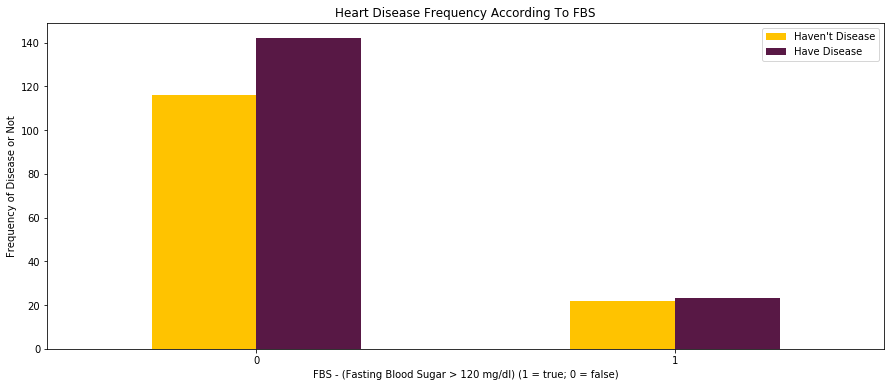

In [22]:
#Heart disease frequency based on FBS

pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

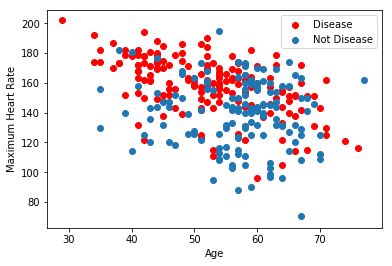

In [23]:
# Maximum Heart rate plotted against the dataset as scatter chart
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [24]:
# one-hot encode to category type columns 

df_clean = pd.get_dummies(df_clean,columns=['sex','cp','fbs','restecg','exang','ca','thal','slope'])

In [25]:
df_clean.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,145,233,150,2.3,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,41,130,204,172,1.4,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,56,120,236,178,0.8,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,57,120,354,163,0.6,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [26]:
#split train and test data set
dataY = df_clean['target']
dataX = df_clean.drop(['target'],axis=1)


X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=5)

In [27]:

#logisticRegression to classify 
#this is the performance benchmark for other classifier 

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

accuracy_score(y_pred_lr,y_test)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9180327868852459

In [28]:

#try to scale float/int value before classification 

from sklearn.preprocessing import StandardScaler

scaled_df = df.copy()

scale_column_name = ['age','trestbps','chol','thalach','oldpeak']

scaled_features = scaled_df[scale_column_name]

scaler = StandardScaler().fit(scaled_features.values)

scaled_features = scaler.transform(scaled_features.values)

scaled_df[scale_column_name] = scaled_features


scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [29]:
# 
scaled_df_clean = pd.get_dummies(scaled_df,columns=['sex','cp','fbs','restecg','exang','ca','thal','slope'])

In [30]:
scaled_df_clean.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [31]:

#split train and test data set
dataY_scaled = scaled_df_clean['target']
dataX_scaled = scaled_df_clean.drop(['target'],axis=1)


X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(dataX_scaled,dataY_scaled,test_size=0.2,random_state=5)


In [32]:
# try with scaled data set with LogisticRegression
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_2,y_train_2)

y_pred_lr_scaled = lr_scaled.predict(X_test_2)

accuracy_score(y_pred_lr_scaled,y_test_2)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9180327868852459

In [33]:
# Try Same logistic regression with hyperparameter tuning using randomized search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform, expon
import scipy.stats

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(lr_scaled, hyperparameters, random_state=0, n_iter=50, cv=5, verbose=0, n_jobs=-1)

# Fit randomized search
lr_rs =clf.fit(X_train_2,y_train_2)


y_pred_lr_scaled = lr_rs.predict(X_test_2)


print(accuracy_score(y_pred_lr_scaled,y_test_2))

0.9180327868852459


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import reciprocal, uniform, expon

svc  =  SVC(kernel='rbf',C=8.5, probability=True)

svc.fit(X_train_2,y_train_2)
y_pred_svc = svc.predict(X_test_2)

print(accuracy_score(y_pred_svc,y_test_2))

svc_f=svc.fit(X_train_2,y_train_2)

0.9016393442622951


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
#using RandomizedSearchCV to optimize svc hyper parameters 

clf_SVC = SVC(kernel='rbf',random_state=42)

params_dist = {'C':uniform(8.0,5),'gamma':[0.0001,0.001,0.01,0.1,1]}

#params_dist =dict(C=reciprocal(1,10),gamma=expon(loc=0.001,scale=0.1))

n_iter_search = 40

random_search = RandomizedSearchCV(clf_SVC,param_distributions=params_dist,n_iter=n_iter_search, cv=3)

random_search.fit(X_train_2,y_train_2)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=40, n_jobs=None,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a261d82b0>, 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [36]:
print(random_search.best_params_)

{'C': 10.412225222806931, 'gamma': 0.001}


In [37]:
y_pred_rand = random_search.predict(X_test_2)

accuracy_score(y_pred_rand,y_test_2)

0.9180327868852459

In [38]:
### Using Random Forest Classifer model

from sklearn.ensemble import RandomForestClassifier

clf_rf=RandomForestClassifier(n_estimators=100)

clf_rf.fit(X_train_2,y_train_2)

y_pred_rf = clf_rf.predict(X_test_2)

accuracy_score(y_pred_rf,y_test_2)

0.9180327868852459

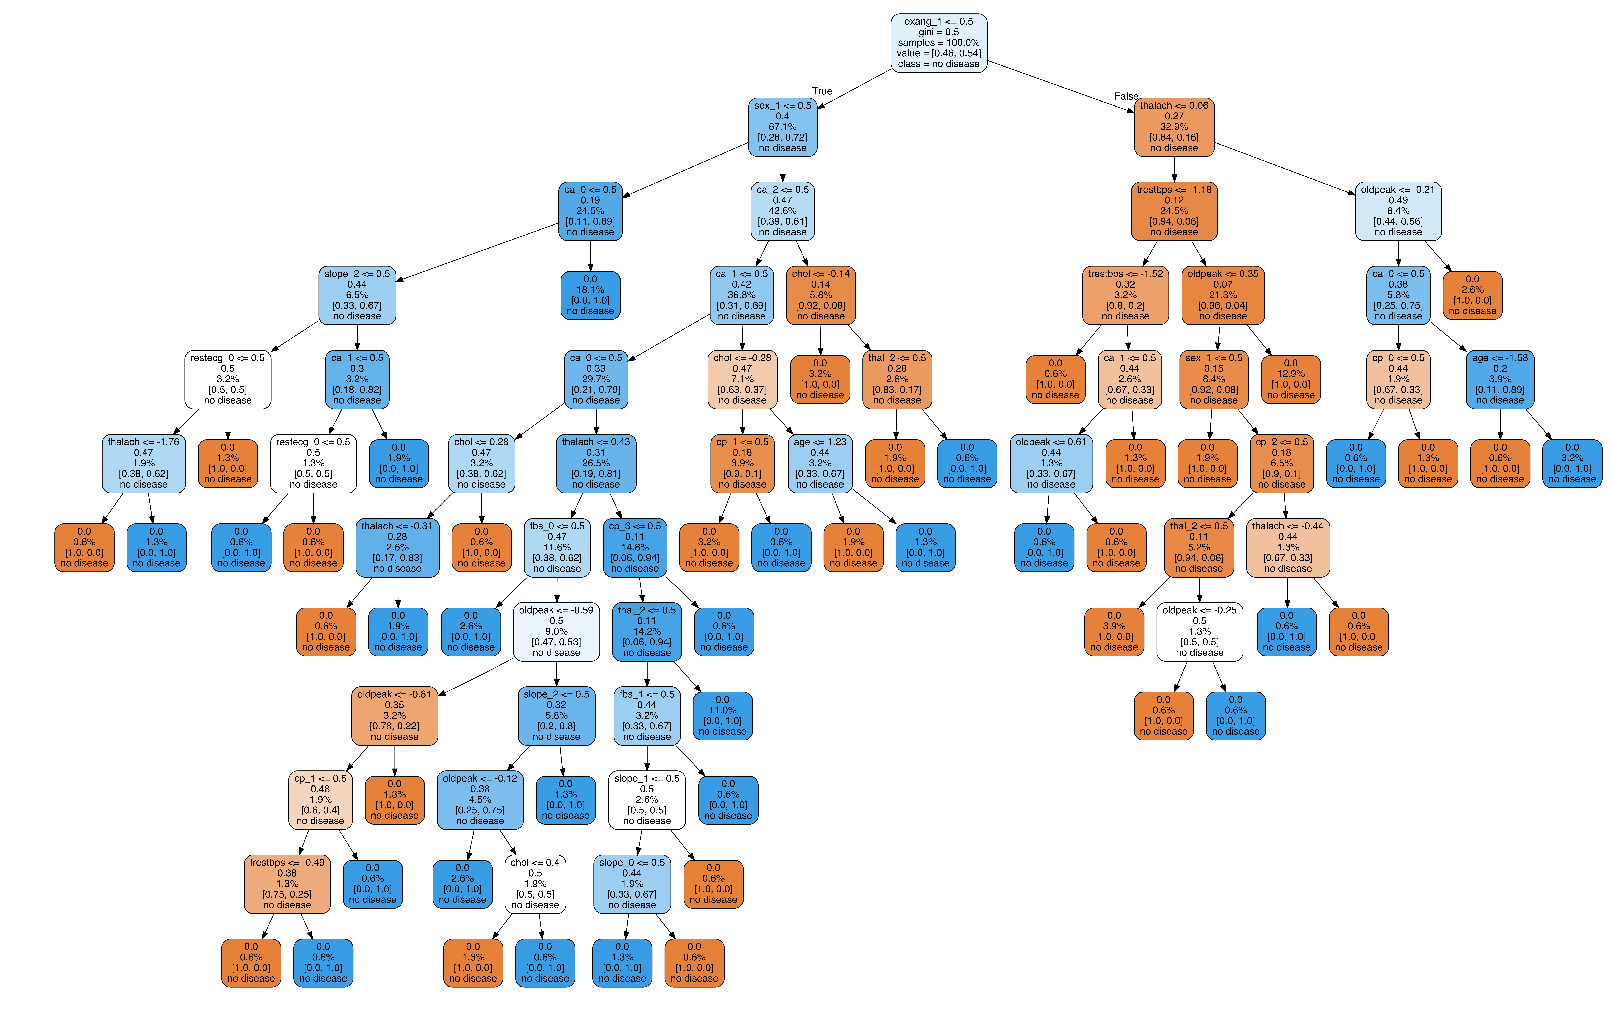

In [55]:
from sklearn.tree import export_graphviz
estimator = clf_rf.estimators_[1]
feature_names = [i for i in X_train_2.columns]

y_train_str = y_train_2.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [39]:
### Using Naive Bayes 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_2,y_train_2)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(X_test_2,y_test_2)*100))

Accuracy of Naive Bayes: 83.61%


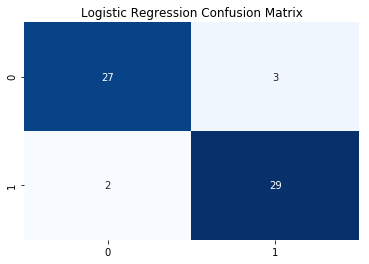

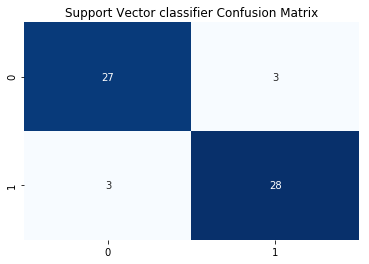

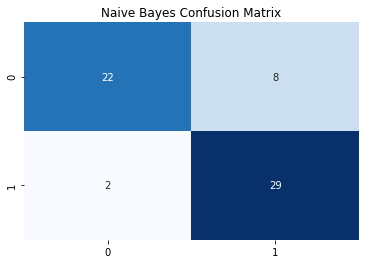

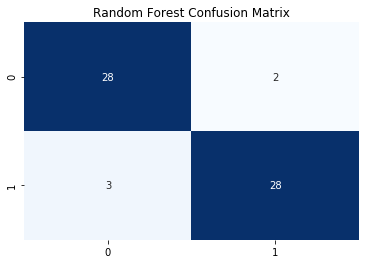

In [40]:
# Confusion matrix and ROC/AUC across methods

# Predicted values
y_head_lr = lr_rs.predict(X_test_2)
y_head_svc = svc_f.predict(X_test_2) 
y_head_nb = nb.predict(X_test_2) 
y_head_rf = clf_rf.predict(X_test_2) 


from sklearn.metrics import confusion_matrix
#1. logistic regression

# confusion matrix plot
cm_lr = confusion_matrix(y_test_2,y_head_lr)

#2. SVC

#Confusion Matrix
cm_svc = confusion_matrix(y_test_2,y_head_svc)


# 3. Random Forest 

# confusion matrix plot
cm_rf = confusion_matrix(y_test_2,y_head_rf)



# 4. Naive Bayes

#Confusion Matrix
cm_nb = confusion_matrix(y_test_2,y_head_nb) 


#plt.subplot(2,1,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

#plt.subplot(2,1,2)
plt.title("Support Vector classifier Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

#plt.subplot(2,2,1)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

#plt.subplot(2,2,1)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.show()

LogisticRegression_Sensitivity :  0.9310344827586207
LogisticRegression_Specificity :  0.90625
Area Under Curve for Logistic Regression Model is:
0.9612903225806453


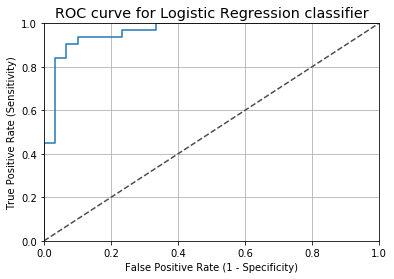

In [41]:
# CONFUSION MATRIX METRICS AND ROC CURVE FOR LOGISTIC REGRESSION

from sklearn.metrics import roc_curve, auc 


# Predicted values
y_head_lr = lr_rs.predict(X_test_2)
y_pred_quant_lr = lr_rs.predict_proba(X_test_2)[:, 1]


from sklearn.metrics import confusion_matrix

#1. logistic regression

# confusion matrix plot
cm_lr = confusion_matrix(y_test_2,y_head_lr)
confusion_matrix=cm_lr
total=sum(sum(cm_lr))
lr_sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('LogisticRegression_Sensitivity : ', lr_sensitivity )
lr_specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('LogisticRegression_Specificity : ', lr_specificity)

# ROC Curve plot and area under curve
fpr, tpr, thresholds = roc_curve(y_test_2, y_pred_quant_lr)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("Area Under Curve for Logistic Regression Model is:")
print(auc(fpr, tpr))

[[27  3]
 [ 3 28]]
Sensitivity :  0.9
Specificity :  0.9032258064516129
Area Under Curve for SVC Model is:
0.9612903225806453


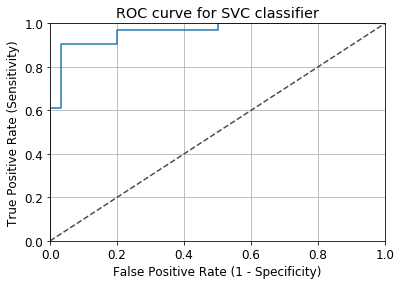

In [42]:
# CONFUSION MATRIX METRICS AND ROC CURVE FOR SVC

from sklearn.metrics import roc_curve, auc 

# Confusion matrix and ROC/AUC across methods

#clf_SVC = clf_SVC.fit(X_train_2, y_train_2)
from sklearn.metrics import confusion_matrix

y_predict = svc_f.predict(X_test_2)
y_pred_quant = svc_f.predict_proba(X_test_2)[:, 1]
#y_pred_quant = svc_f.predict_proba(X_test_2)
y_pred_bin = svc_f.predict(X_test_2)

confusion_matrix = confusion_matrix(y_test, y_pred_bin)
print(confusion_matrix)

total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test_2, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVC classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("Area Under Curve for SVC Model is:")
print(auc(fpr, tpr))

[[28  2]
 [ 3 28]]
Sensitivity :  0.9032258064516129
Specificity :  0.9333333333333333
Area Under Curve for Random Forest Model is:
0.9596774193548387


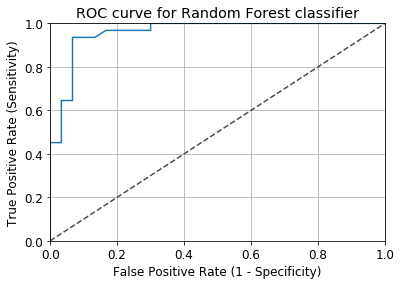

In [43]:
# CONFUSION MATRIX METRICS AND ROC CURVE FOR RANDOM FOREST

from sklearn.metrics import roc_curve, auc 

# Confusion matrix and ROC/AUC across methods

# Predicted values

#y_head_rf = clf_rf.predict(X_test_2) 
#y_pred_quant_rf = clf_rf.predict_proba(X_test_2)[:, 1]

from sklearn.metrics import confusion_matrix

y_predict = clf_rf.predict(X_test_2)
y_pred_quant = clf_rf.predict_proba(X_test_2)[:, 1]
y_pred_bin = clf_rf.predict(X_test_2)

confusion_matrix = confusion_matrix(y_test, y_pred_bin)
print(confusion_matrix)

total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test_2, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Random Forest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("Area Under Curve for Random Forest Model is:")
print(auc(fpr, tpr))

[[22  8]
 [ 2 29]]
Sensitivity :  0.9166666666666666
Specificity :  0.7837837837837838
Area Under Curve for Naive Bayes Model is:
0.9182795698924732


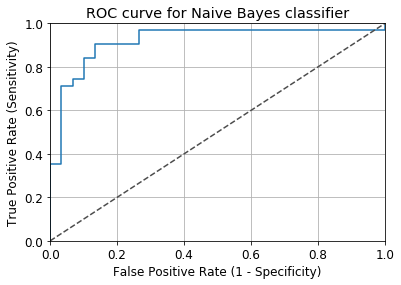

In [44]:
# CONFUSION MATRIX METRICS AND ROC CURVE FOR RANDOM FOREST

from sklearn.metrics import roc_curve, auc 

# Confusion matrix and ROC/AUC across methods

# Predicted values

#y_head_rf = clf_rf.predict(X_test_2) 
#y_pred_quant_rf = clf_rf.predict_proba(X_test_2)[:, 1]

from sklearn.metrics import confusion_matrix

y_predict = nb.predict(X_test_2)
y_pred_quant = nb.predict_proba(X_test_2)[:, 1]
y_pred_bin = nb.predict(X_test_2)

confusion_matrix = confusion_matrix(y_test, y_pred_bin)
print(confusion_matrix)


total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

fpr, tpr, thresholds = roc_curve(y_test_2, y_pred_quant)



fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Naive Bayes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("Area Under Curve for Naive Bayes Model is:")
print(auc(fpr, tpr))

In [45]:
X_train_2.shape

(242, 30)

In [45]:
# try with NN
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=30))
model.add(Dense(1,activation='sigmoid'))
          
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.fit(X_train_2,y_train_2,epochs=200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200


In [1]:
y_pred_nn = model.predict(X_test_2)


NameError: name 'model' is not defined

In [ ]:
count=0

ambiguous_set=[]

for i in y_pred_nn:
    if i>0.4 and i<0.6:
        count = count+1
        ambiguous_set.append(i)
print(ambiguous_set)

In [ ]:
rounded1 = [round(x[0]) for x in y_pred_nn]

y_pred_nn1_final = rounded1

score_nn1 = round(accuracy_score(y_pred_nn1_final,y_test_2)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn1)+" %")

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [ ]:
#
age_column  = df['age']

age_categoried = []
for i in age_column:
    if i<36:
        age_categoried.append(0)
    elif i<=54:
        age_categoried.append(1)
    elif i<=63:
        age_categoried.append(2)
    else:
        age_categoried.append(3)
# add age as categoried data 

df_categoried = df.copy()
df_categoried['age']=age_categoried

df_categoried.head()

In [ ]:

dataY_3 = df_categoried['target']
dataX_3 = df_categoried.drop(['target'],axis=1)



from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

columns_to_scale = ['trestbps','chol','thalach','oldpeak']
columns_to_encode=['age','sex','cp','fbs','restecg','exang','ca','thal','slope']


scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(df_categoried[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(df_categoried[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)


In [ ]:
print (pd.DataFrame(processed_data).head())

In [ ]:
X_train_3,X_test_3,y_train_3,y_test_3=train_test_split(processed_data,dataY_3,test_size=0.2,random_state=5)

In [ ]:
X_train_3.shape

In [ ]:
model2 = Sequential()
model2.add(Dense(16,activation='relu',input_dim=33))
model2.add(Dense(4,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
          
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model2.fit(X_train_3,y_train_3,epochs=200)

In [ ]:
y_pred_nn2 = model2.predict(X_test_3)

In [ ]:
rounded2 = [round(x[0]) for x in y_pred_nn2]

y_pred_nn2_final = rounded2

score_nn2 = round(accuracy_score(y_pred_nn2_final,y_test_3)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn2)+" %")

###   3 layers NN performance a litte bit better over 2 layers NN, since the size limitation of the data , can not build more layer structure to do further comparison.

In [ ]:
lr3 = LogisticRegression()
lr3.fit(X_train_3,y_train_3)

y_pred_lr3 = lr3.predict(X_test_3)

accuracy_score(y_pred_lr3,y_test_3)


In [ ]:
# CONFUSION MATRIX METRICS AND ROC CURVE FOR LOGISTIC REGRESSION

from sklearn.metrics import roc_curve, auc 

lr3_fit=lr3.fit(X_train_3,y_train_3)


# Predicted values
y_head_lr = lr3_fit.predict(X_test_3)
y_pred_quant_lr = lr3_fit.predict_proba(X_test_3)[:, 1]


from sklearn.metrics import confusion_matrix

#1. logistic regression

# confusion matrix plot
cm_lr = confusion_matrix(y_test_3,y_head_lr)
confusion_matrix=cm_lr
total=sum(sum(cm_lr))
lr_sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('LogisticRegression_Sensitivity : ', lr_sensitivity )
lr_specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('LogisticRegression_Specificity : ', lr_specificity)

# ROC Curve plot and area under curve
fpr, tpr, thresholds = roc_curve(y_test_3, y_pred_quant_lr)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("Area Under Curve for Logistic Regression Model is:")
print(auc(fpr, tpr))